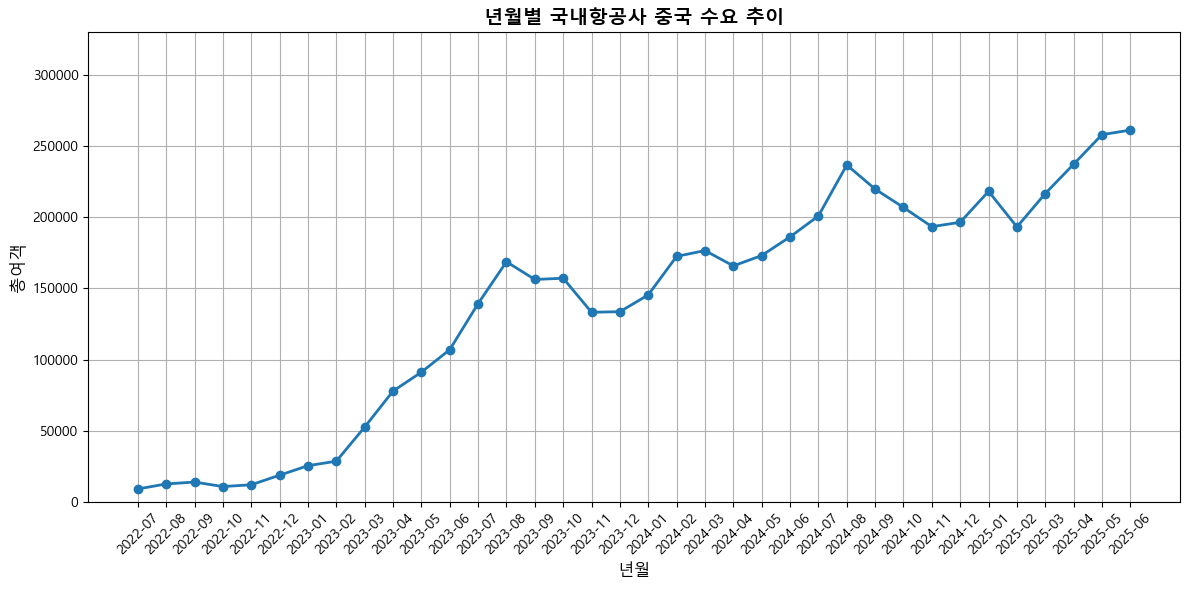

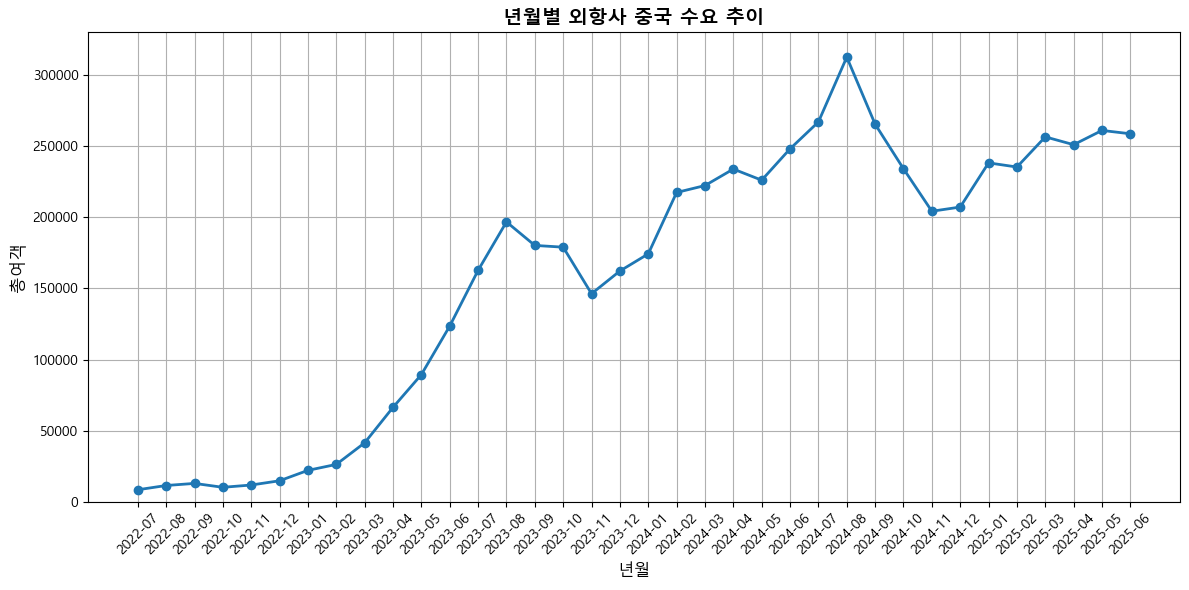

5005780
5778917


In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

df = pd.read_csv('../data/passenger_analysis.csv', encoding='cp949')
df['년월'] = df['년도'].astype(str) + '-' + df['월'].astype(str).str.zfill(2)
df = df[df['년월'] >= '2022-07']

#코로나 이후, 중국 수요 증가 확인(국적기, 외항사)
code = ('KE', 'OZ', '7C', 'LJ', 'TW', 'ZE', 'RS', 'BX', 'RF', 'KJ', 'YP')
def to_china(df, domestic=True):
    base = df[(df['한글국가명'] == '중국')
              & (df['도착_출발'] == '도착')]
    if domestic: # 국내 항공사만
        base = base[base['항공사(IATA)'].isin(code)] 
    else:
        base = base[~base['항공사(IATA)'].isin(code)]
    return base.groupby(['년월'])['총여객(명)'].sum().reset_index()

china_dm = to_china(df, domestic=True)
china_fr = to_china(df, domestic=False)

def graph(df, n='a'):
    plt.figure(figsize=(12,6))
    plt.plot(df['년월'], df['총여객(명)'], marker='o', linewidth=2)
    plt.title(n, fontsize=14, fontweight='bold')
    plt.xlabel('년월', fontsize=12)
    plt.ylabel('총여객', fontsize=12)
    plt.xticks(rotation=45)
    plt.ylim(0, 330000)
    plt.grid(True)

    plt.tight_layout()
    return plt.show()

graph(china_dm, '년월별 국내항공사 중국 수요 추이')
graph(china_fr, '년월별 외항사 중국 수요 추이')

#23년 8월 중국인 (inbound to한국)단체관광객 증가 
#24년 11월 한국인 중국 무비자 입국 허용

print(china_dm['총여객(명)'].sum())
print(china_fr['총여객(명)'].sum())


In [32]:
#중국 도착 외항사(중국항공사)
df1 = df[(df['한글국가명'] == '중국') & (df['도착_출발'] == '도착') & (~df['항공사(IATA)'].isin(code)) & (df['총여객(명)'] > 0)]
grouped = df1.groupby(['항공사(IATA)', '항공사명'])['총여객(명)'].sum().reset_index()
grouped['점유율(%)'] = (grouped['총여객(명)'] / grouped['총여객(명)'].sum() * 100).round(2)
grouped.sort_values('총여객(명)', ascending=False).reset_index(drop=True)

,항공사(IATA),항공사명,총여객(명),점유율(%)
0,MU,중국동방항공,1732720,29.98
1,CZ,중국남방항공,1502746,26.00
2,CA,중국국제항공,837400,14.49
3,SC,산동항공,836977,14.48
4,ZH,심천항공,217058,3.76
5,MF,중국하문항공,175071,3.03
6,9C,춘추항공,129765,2.25
7,FM,상하이 항공,105573,1.83
8,QW,청도항공,93246,1.61
9,GS,톈진(천진) 에어라인,67362,1.17


In [33]:
#여행지로서 중국이 부상하고 있다는 근거
#전통적 강세 국가(일본, 태국, 베트남)와 2024 하계 수요 밀려난 국가(필리핀)의 비교
df.rename(columns={'한글국가명':'국가'}, inplace=True)

country = ('중국', '일본', '태국', '베트남', '필리핀')
df2 = df[(df['국가'].isin(country)) & (df['도착_출발'] == '도착')].copy()

grouped = df2.groupby(['년도', '국가'])['총여객(명)'].sum().reset_index()
pivot = grouped.pivot_table(index = '국가',
                            columns = '년도',
                            values = '총여객(명)')
pivot

년도,2022,2023,2024,2025
국가,,,,
베트남,992919.0,3449028.0,4099556.0,2015098.0
일본,988426.0,6752616.0,8889561.0,4683116.0
중국,146128.0,2666575.0,5086388.0,2885606.0
태국,571285.0,1772444.0,1948916.0,878621.0
필리핀,517724.0,1764995.0,1946617.0,918743.0


In [34]:
grouped['total'] = grouped.groupby(['년도'])['총여객(명)'].transform('sum')
grouped['점유율(%)'] = (grouped['총여객(명)'] / grouped['total'] * 100).round(2)
grouped

,년도,국가,총여객(명),total,점유율(%)
0,2022,베트남,992919,3216482,30.87
1,2022,일본,988426,3216482,30.73
2,2022,중국,146128,3216482,4.54
3,2022,태국,571285,3216482,17.76
4,2022,필리핀,517724,3216482,16.10
5,2023,베트남,3449028,16405658,21.02
6,2023,일본,6752616,16405658,41.16
7,2023,중국,2666575,16405658,16.25
8,2023,태국,1772444,16405658,10.80
9,2023,필리핀,1764995,16405658,10.76


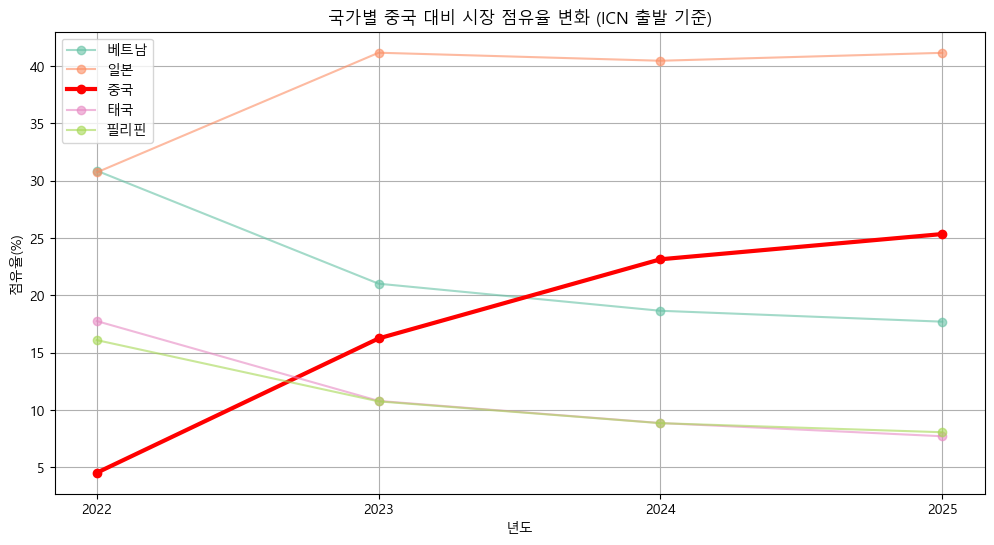

In [35]:
import seaborn as sns

plt.figure(figsize=(12,6))

countries = grouped['국가'].unique()
palette = sns.color_palette("Set2", len(countries))

for idx, c in enumerate(countries):
    temp = grouped[grouped['국가'] == c]
    
    if c == "중국":
        plt.plot(temp['년도'], temp['점유율(%)'], marker='o',
                 color='red', linewidth=3, label="중국")
    else:
        plt.plot(temp['년도'], temp['점유율(%)'], marker='o',
                 color=palette[idx], alpha=0.6, linewidth=1.5, label=c)

plt.title("국가별 중국 대비 시장 점유율 변화 (ICN 출발 기준)")
plt.xlabel("년도")
plt.ylabel("점유율(%)")
plt.xticks(sorted(grouped['년도'].unique()))
plt.legend()
plt.grid(True)
plt.show()



In [36]:
yoy = pivot.pct_change(axis=1)*100
yoy = yoy.round(2)

yoy.columns = [f'YoY(%)_{col}' for col in yoy.columns]
yoy

,YoY(%)_2022,YoY(%)_2023,YoY(%)_2024,YoY(%)_2025
국가,,,,
베트남,NaN,247.36,18.86,-50.85
일본,NaN,583.17,31.65,-47.32
중국,NaN,1724.82,90.75,-43.27
태국,NaN,210.26,9.96,-54.92
필리핀,NaN,240.91,10.29,-52.80


In [37]:
#중국 내 인기 지역(여행지)[국적기/외항사 모두 포함]
df = pd.read_csv('../data/passenger_analysis.csv', encoding='cp949')

df1 = df[(df['한글국가명'] == '중국') & (df['도착_출발'] == '도착') & (df['총여객(명)'] > 0)].copy()
top_spot = df1.groupby(['영문도시명'])['총여객(명)'].sum().reset_index().sort_values('총여객(명)', ascending=False).reset_index(drop=True).iloc[:10]
top_spot['per'] = (top_spot['총여객(명)']*100 / df1['총여객(명)'].sum()).round(2)
top_spot

,영문도시명,총여객(명),per
0,Shanghai,1812736,16.68
1,Qingdao,1474300,13.57
2,Beijing,1126135,10.36
3,Guangzhou,703556,6.47
4,Yanji,593883,5.46
5,Shenyang,527501,4.85
6,Shenzhen,453701,4.17
7,Dalian,448353,4.13
8,Hangzhou,378892,3.49
9,Yantai,338627,3.12


In [38]:
df1.rename(columns={'영문도시명':'도시'}, inplace=True)

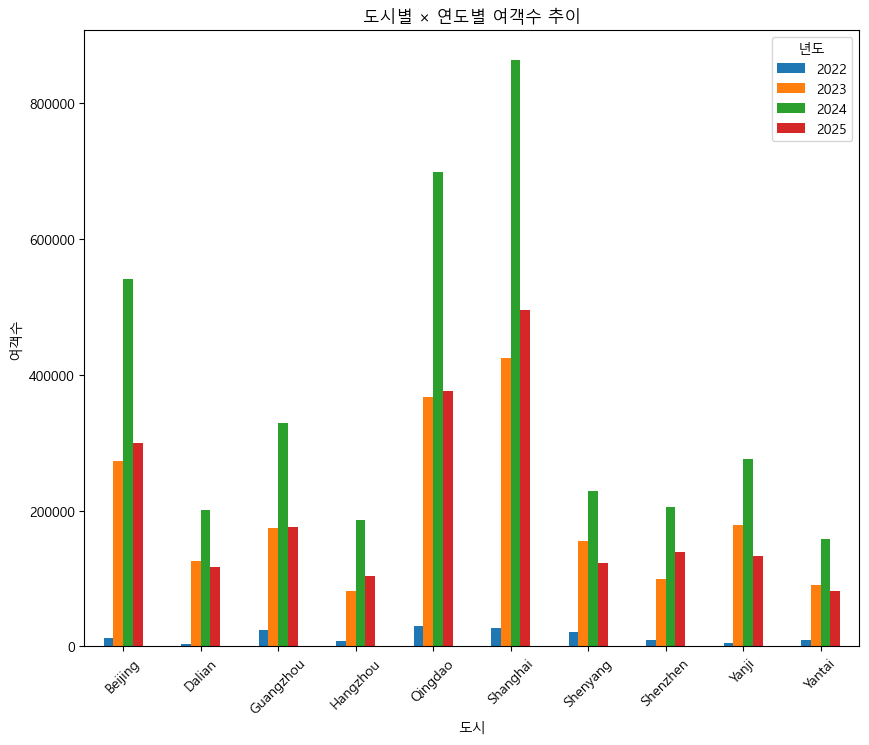

In [39]:
#도시별*연도별 여객수 추이 / 인기 top10 기준
top = df1[df1['도시'].isin(top_spot['영문도시명'])]
grouping = top.groupby(['년도','도시'])['총여객(명)'].sum().reset_index()
pivot1 = grouping.pivot_table(index='도시',
                             columns='년도',
                             values='총여객(명)')
pivot1.plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=45)
plt.ylabel('여객수')
plt.title('도시별 × 연도별 여객수 추이')
plt.show()

In [40]:
#연환산 식 = 전체/월 * 12
year_s = df1.groupby(['년도'])['총여객(명)'].sum()
month_c = df1.groupby(['년도'])['월'].nunique()
annual = year_s/month_c * 12

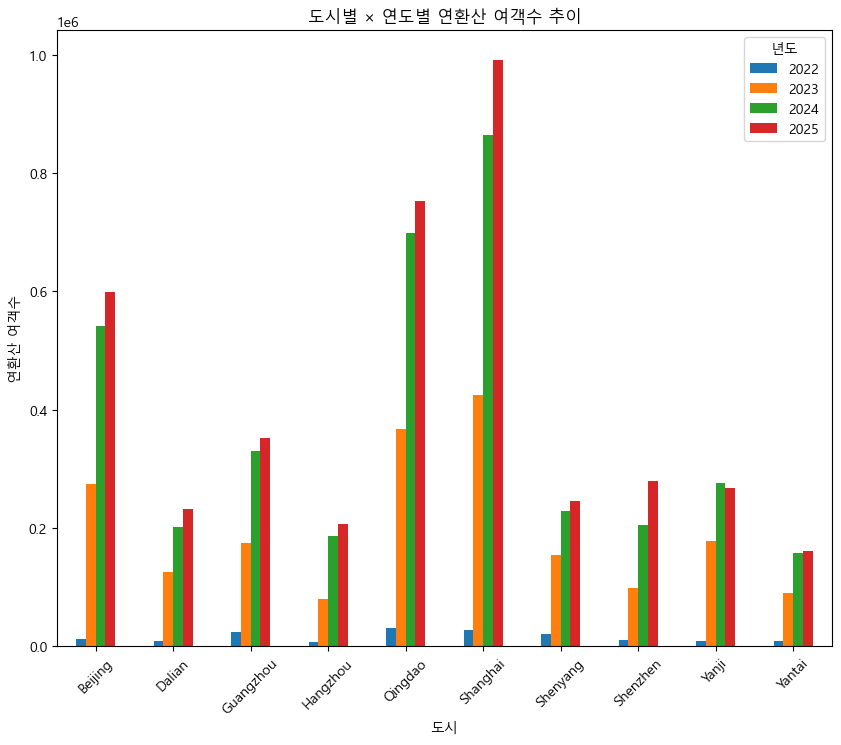

In [41]:
#도시별로 연환산/ 인기 top10 도시 기준

# 1) 도시별, 연도별 총합계
city_year = top.groupby(['도시', '년도'])['총여객(명)'].sum().reset_index()

# 2) 도시별*연도별 월수 구하기
months = top.groupby(['도시', '년도'])['월'].nunique().reset_index()
months.rename(columns = {'월':'개월수'}, inplace=True)

# 3) 1,2 결합 -> 연환산 계산
merged = pd.merge(city_year, months, on=['도시','년도'], how='left')
merged['연환산'] = merged['총여객(명)'] / merged['개월수'] * 12

# 4) pivot형태로 변환
pivot2 = merged.pivot(index = '도시',
                     columns='년도',
                     values = '연환산')

# 5) 시각화
pivot2.plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=45)
plt.ylabel('연환산 여객수')
plt.title('도시별 × 연도별 연환산 여객수 추이')
plt.show()


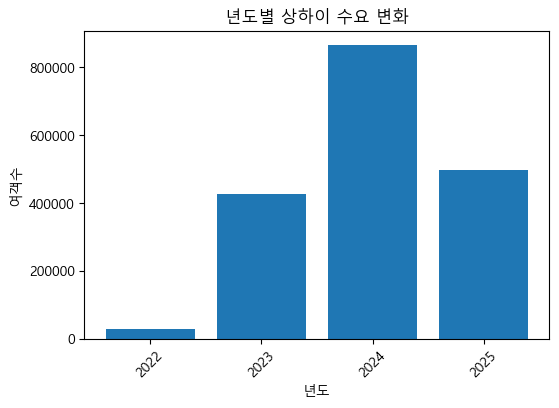

In [42]:
#년도별 인기 여행지 수요 변화
def trend(df1, a, n):
    top = df1[df1['도시'] == a]
    grouping = top.groupby(['년도'])['총여객(명)'].sum().reset_index()
    grouping['년도'] = grouping['년도'].astype(int)

    plt.figure(figsize=(6,4))
    plt.bar(grouping['년도'], grouping['총여객(명)'])
    plt.xticks(grouping['년도'].unique(), rotation=45)
    plt.title(f'년도별 {n} 수요 변화')
    plt.xlabel('년도')
    plt.ylabel('여객수')
    return plt.show()

trend(df1, 'Shanghai', '상하이')

In [43]:
# Shenzhen지역 수요 변화 확인
sz = top[(top['도시'] == 'Shenzhen') & (top['년도'] == 2025)]
sz.groupby(['월'])[['총여객(명)','운항(편)']].sum().reset_index()

,월,총여객(명),운항(편)
0,1,22737,142.0
1,2,18294,126.0
2,3,24197,145.0
3,4,26200,146.0
4,5,24886,151.0
5,6,23069,147.0


In [44]:
# Shenzhen지역 YOY
def monthly(top, year):
    sz = top[(top['도시'] == 'Shenzhen') & (top['년도'] == year)]
    return sz.groupby('월')['총여객(명)'].sum()

years = (2023,2024,2025)
data = []
for y in years:
    data.append(monthly(top, y))

sz = pd.concat(data, axis=1)
sz.columns=['2023','2024','2025']

#YoY계산 
sz['YoY(%)_24']=((sz['2024']-sz['2023'])* 100/sz['2023']).round(2) 
sz['YoY(%)_25']=((sz['2025']-sz['2024'])* 100/sz['2024']).round(2) 
sz

,2023,2024,2025,YoY(%)_24,YoY(%)_25
월,,,,,
1,1751,15752,22737.0,799.60,44.34
2,1876,14389,18294.0,667.00,27.14
3,3763,16770,24197.0,345.66,44.29
4,8842,16064,26200.0,81.68,63.10
5,9029,14279,24886.0,58.15,74.28
6,10047,15962,23069.0,58.87,44.52
7,8404,16145,NaN,92.11,NaN
8,8362,17821,NaN,113.12,NaN
9,9246,20165,NaN,118.09,NaN


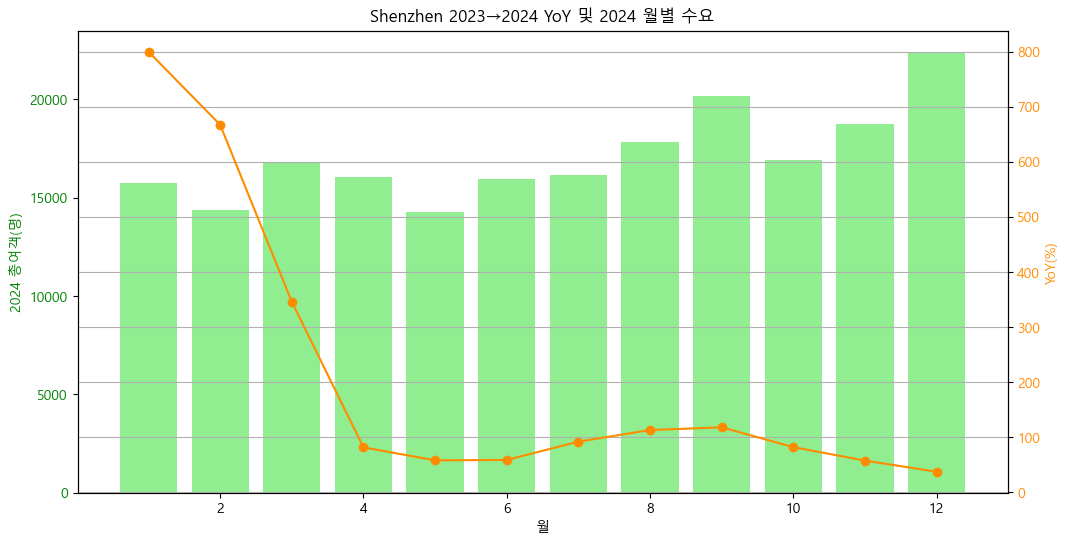

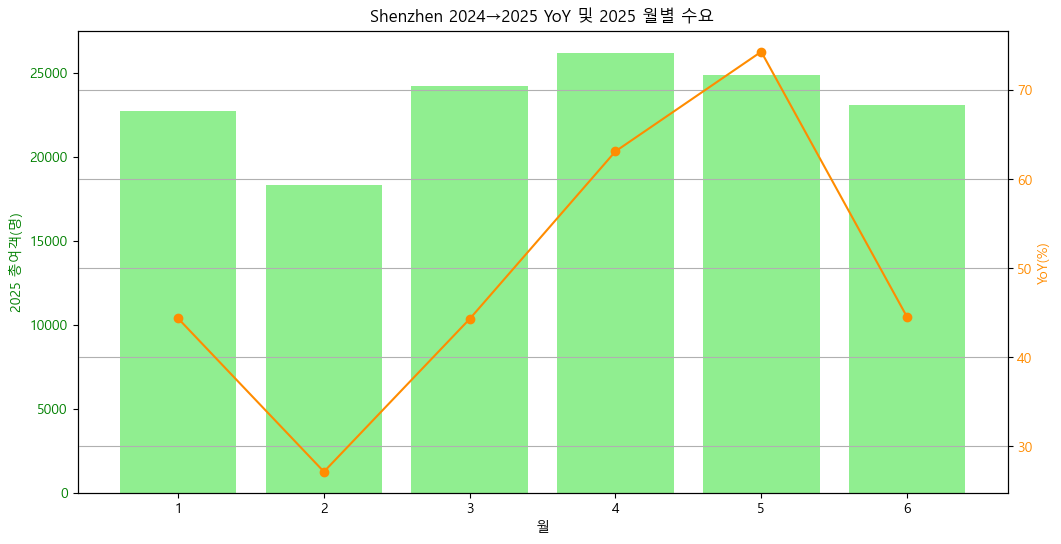

In [45]:
def graph(col1, n, col2, title):    
    fig, ax1 = plt.subplots(figsize=(12,6))

    # 절대 수요 (막대)
    ax1.bar(sz.index, sz[col1], color='lightgreen') # label='2024 총여객'/'2025 총여객'
    ax1.set_ylabel(f'{n} 총여객(명)', color='green')
    ax1.set_xlabel('월')
    ax1.tick_params(axis='y', labelcolor='green')

    # YoY (선)
    ax2 = ax1.twinx()
    ax2.plot(sz.index, sz[col2], color='darkorange', marker='o') # label='YoY 23→24'/'YoY 24→25'
    ax2.set_ylabel('YoY(%)', color='darkorange')
    ax2.tick_params(axis='y', labelcolor='darkorange')

    #범례 표시
    #ax1.legend('upper left')
    #ax2.legend('upper right')

    plt.title(title)
    plt.grid(True)
    plt.show()

YoY_23_24 = graph('2024', 2024, 'YoY(%)_24', 'Shenzhen 2023→2024 YoY 및 2024 월별 수요')
YoY_24_25 = graph('2025', 2025, 'YoY(%)_25', 'Shenzhen 2024→2025 YoY 및 2025 월별 수요')


In [46]:
import numpy as np

#중국 top10 도시 항공사 점유율[국적기/외항사 포함]
# top5=('Qingdao', 'Shanghai', 'Shenzhen', 'Guangzhou', 'Beijing')
t_spot = df1[df1['도시'].isin(top_spot['영문도시명'])]
grouped = t_spot.groupby(['도시','항공사(IATA)','항공사명'])['총여객(명)'].sum().reset_index()
grouped['국적기_여부'] = np.where(grouped['항공사(IATA)'].isin(code), '국적기', '외항사')
grouped['도시별합계'] = grouped.groupby(['도시'])['총여객(명)'].transform('sum')
grouped['점유율(%)'] = (grouped['총여객(명)'] / grouped['도시별합계'] * 100).round(2)

g_pivot = grouped.pivot(index = ['항공사명', '항공사(IATA)', '국적기_여부'],
                        columns = '도시',
                        values = '점유율(%)')
g_pivot.sort_values('국적기_여부')


,,도시,Beijing,Dalian,Guangzhou,Hangzhou,Qingdao,Shanghai,Shenyang,Shenzhen,Yanji,Yantai
항공사명,항공사(IATA),국적기_여부,,,,,,,,,,
대한항공,KE,국적기,18.68,35.09,23.65,10.49,16.92,23.42,52.65,28.66,18.20,NaN
진 에어,LJ,국적기,NaN,NaN,NaN,NaN,0.44,NaN,NaN,NaN,NaN,NaN
제주항공,7C,국적기,0.03,NaN,NaN,NaN,6.11,NaN,NaN,NaN,12.93,7.58
에어서울,RS,국적기,NaN,NaN,NaN,NaN,0.63,NaN,NaN,NaN,NaN,2.76
에어 부산,BX,국적기,NaN,NaN,NaN,NaN,0.31,NaN,NaN,NaN,NaN,NaN
이스타 항공,ZE,국적기,NaN,NaN,NaN,NaN,NaN,2.02,NaN,NaN,NaN,NaN
아시아나항공,OZ,국적기,28.05,17.73,30.20,35.19,2.14,24.30,NaN,12.79,20.51,NaN
티웨이항공,TW,국적기,0.05,NaN,NaN,NaN,1.34,NaN,11.08,NaN,0.68,NaN
심천항공,ZH,외항사,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.71,NaN,NaN


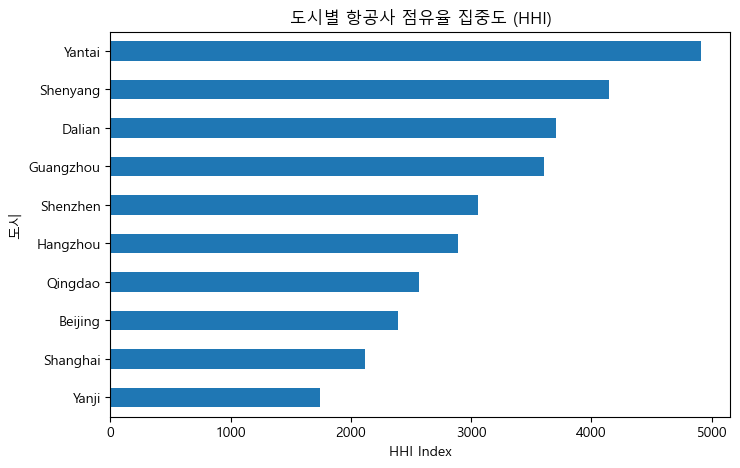

In [47]:
#점유율 집중도
# Herfindahl-Hirschman Index (HHI)
# HHI = ∑ (시장점유율²)
hhi = (g_pivot**2).sum(axis=0)
hhi

hhi.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("도시별 항공사 점유율 집중도 (HHI)")
plt.xlabel("HHI Index")
plt.show()